residual_aperture_sum
---------------------
        16112.1067787



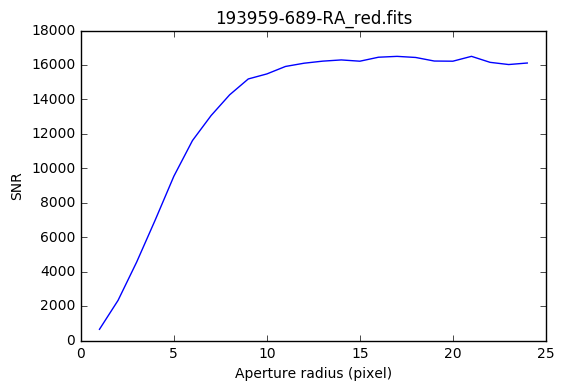

In [14]:
from astropy.stats import sigma_clipped_stats
import glob as glob
import operator
import numpy as np
import astropy.io.fits as pf
import photutils as phot
import matplotlib.pyplot as plt
%matplotlib inline

refstar1listx=[]
refstar1listy=[]

galaxy_RA=159.42566
galaxy_DEC=21.886981
    
for file in glob.glob("C:/Users/dirmu/Documents/fieldtrip/45p_watcher/03_17/20170317193959-689-RA_red.fits"):
    hdulist=pf.open(file)
    mydata=hdulist[0].data
    #mean, median, std = sigma_clipped_stats(mydata, sigma=3.0, iters=5)        
    
    
    FITS_header=hdulist[0].header
    


    crpix1 = FITS_header['CRPIX1'] - 1 # X of reference pixel
    crpix2 = FITS_header['CRPIX2'] - 1 # Y of reference pixel
    crval1 = FITS_header['CRVAL1'] # RA of reference pixel
    crval2 = FITS_header['CRVAL2'] # DEC of reference pixel
    cd1_1 = FITS_header['CD1_1'] # RA deg per column pixel
    cd1_2 = FITS_header['CD1_2'] # RA deg per row pixel
    cd2_1 = FITS_header['CD2_1'] # DEC deg per column pixel
    cd2_2 = FITS_header['CD2_2'] # DEC deg per row pixel

# Find the X,Y values of the galaxy's RA and DEC.
    det = cd1_1 * cd2_2 - cd1_2 * cd2_1

    cdinv11 = cd2_2 / det
    cdinv12 = -cd1_2 / det
    cdinv21 = -cd2_1 / det
    cdinv22 = cd1_1 / det

    ra0 = crval1 / 180.0 * np.pi
    dec0 = crval2 / 180.0 * np.pi
    ra = galaxy_RA / 180.0 * np.pi
    dec = galaxy_DEC / 180.0 * np.pi

    bottom = np.sin(dec)*np.sin(dec0) + np.cos(dec)*np.cos(dec0)*np.cos(ra-ra0)

    xi = np.cos(dec) * np.sin(ra-ra0) / bottom
    eta = (np.sin(dec)*np.cos(dec0) - np.cos(dec)*np.sin(dec0)*np.cos(ra-ra0)) / bottom
    xi = xi * 180.0 / np.pi
    eta = eta * 180.0 / np.pi

    galaxy_X = cdinv11 * xi + cdinv12 * eta + crpix1
    galaxy_Y = cdinv21 * xi + cdinv22 * eta + crpix2
    
    refstar1listx.append(galaxy_X)
    refstar1listy.append(galaxy_Y)
    
    image1 = pf.getdata(file)

    # Define centre of aperture
    position = [(galaxy_X,galaxy_Y)]

    SNR_arr = []

    # Loop to find peak SNR
    for r_i in range(1,25,1):
        # Define aperture
        aperture_ob = phot.CircularAperture(position, r=r_i)

        # Donut aperture for background subtraction
        aperture_bkg = phot.CircularAnnulus(position, r_in=15, r_out = 20)

        apers = [aperture_ob, aperture_bkg]

        # Flux information
        phot_table = phot.aperture_photometry(image1,apers)

        bkg_mean = phot_table['aperture_sum_1']/aperture_bkg.area()

        bkg_sum = bkg_mean * aperture_ob.area()
        final_sum = phot_table['aperture_sum_0'] - bkg_sum
        phot_table['residual_aperture_sum'] = final_sum
        SNR = final_sum/(final_sum)**1/2
        SNR_arr.append(final_sum)
    print(phot_table['residual_aperture_sum'])
    print()
    name = file[-22:]

    rad = range(1,25,1)
    plt.plot(rad,SNR_arr)
    plt.title(name)
    plt.xlabel("Aperture radius (pixel)")
    plt.ylabel("SNR")
    plt.show()
    
    

# print('I finished')
# for i in range(len(refstar1listx)):
#     print('{},{} /n'.format(refstar1listx[i],refstar1listy[i]))

#it is the source with the peak flux

residual_aperture_sum
---------------------
        210222.511352


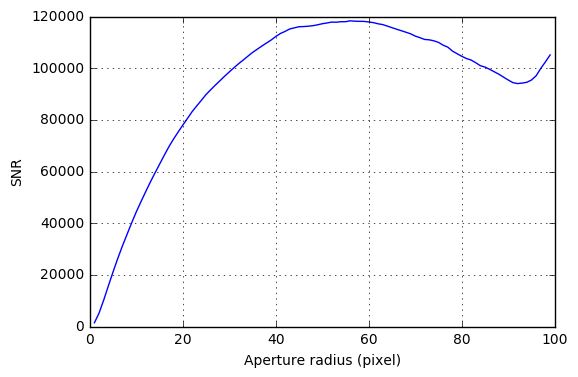

In [23]:
import numpy as np
import astropy.io.fits as pf
import photutils as phot
import matplotlib.pyplot as plt
import glob
%matplotlib inline



# Load file
im_loc = glob.glob("C:/Users/dirmu/Documents/fieldtrip/Stacked/71P/*.fits")
image1 = pf.getdata(im_loc[0])

# Define centre of aperture
star = [(969.89814,730.85272)]
comet = [(500,500)]
position = comet

SNR_arr = []
rad = range(1,100,1)

# Loop to find peak SNR
for r_i in rad:
    # Define aperture
    aperture_ob = phot.CircularAperture(position, r=r_i)

    # Donut aperture for background subtraction
    aperture_bkg = phot.CircularAnnulus(position, r_in=100, r_out = 110)

    apers = [aperture_ob, aperture_bkg]

    # Flux information
    phot_table = phot.aperture_photometry(image1,apers)

    bkg_mean = phot_table['aperture_sum_1']/aperture_bkg.area()

    bkg_sum = bkg_mean*aperture_ob.area()
    final_sum = phot_table['aperture_sum_0'] - bkg_sum
    phot_table['residual_aperture_sum'] = final_sum
    SNR = (final_sum)**1/2
    SNR_arr.append(SNR)
print(phot_table['residual_aperture_sum']) 


plt.plot(rad,SNR_arr)
plt.xlabel("Aperture radius (pixel)")
plt.ylabel("SNR")
plt.grid()
plt.show()

In [24]:
max_SNR = max(SNR_arr)
aper_size = rad[SNR_arr.index(max_SNR)]
print(aper_size)

56


In [33]:
import numpy as np
import astropy.io.fits as pf
import photutils as phot
import matplotlib.pyplot as plt
import glob
%matplotlib inline


# Load file
im_loc = glob.glob("C:/Users/dirmu/Documents/fieldtrip/Stacked/71P/*.fits")
image1 = pf.getdata(im_loc[1])

# Define centre of aperture
star = [(969.89814,730.85272)]
comet = [(501,501)]
position = star

# Define aperture
aperture_ob = phot.CircularAperture(position, r=56)

# Donut aperture for background subtraction
aperture_bkg = phot.CircularAnnulus(position, r_in=100, r_out = 110)

apers = [aperture_ob, aperture_bkg]

# Flux information
phot_table = phot.aperture_photometry(image1,apers)

bkg_mean = phot_table['aperture_sum_1']/aperture_bkg.area()

bkg_sum = bkg_mean*aperture_ob.area()
final_sum = phot_table['aperture_sum_0'] - bkg_sum
phot_table['residual_aperture_sum'] = final_sum
print(phot_table) 

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1 residual_aperture_sum
       pix       pix                                                       
--- --------- --------- -------------- -------------- ---------------------
  1 969.89814 730.85272  13302105.0537  8221777.58377         1024250.52865


In [23]:
# Instrumental magnitude
import numpy as np

def instm(f):
    return -2.5*(np.log10(f))

print(instm(745191))

-14.6806690027


residual_aperture_sum
---------------------
        29834.4248041
Aperture size for max S/N = 10


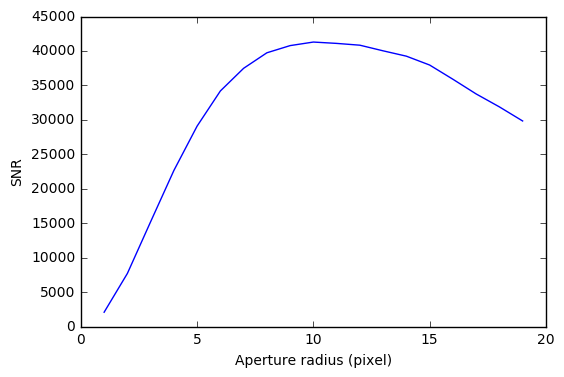

In [9]:
import numpy as np
import astropy.io.fits as pf
import photutils as phot
import matplotlib.pyplot as plt
import glob
%matplotlib inline



# Load file
im_loc = glob.glob("C:/Users/dirmu/Documents/fieldtrip/45P_watcher/03_17/20170317194409-388-RA_red.fits")
image1 = pf.getdata(im_loc[0])

# Define centre of aperture
# Object
position = [(838.35677,563.48431)]


SNR_arr = []

rad = range(1,20,1)

# Loop to find peak SNR
for r_i in rad:
    # Define aperture
    aperture_ob = phot.CircularAperture(position, r=r_i)

    # Donut aperture for background subtraction
    aperture_bkg = phot.CircularAperture(position, r=30)

    apers = [aperture_ob, aperture_bkg]

    # Flux information
    phot_table = phot.aperture_photometry(image1,apers)

    bkg_mean = phot_table['aperture_sum_1']/aperture_bkg.area()

    bkg_sum = bkg_mean*aperture_ob.area()
    final_sum = phot_table['aperture_sum_0'] - bkg_sum
    phot_table['residual_aperture_sum'] = final_sum
    SNR = (final_sum)**1/2
    SNR_arr.append(final_sum)
print(phot_table['residual_aperture_sum']) 
max_SNR = max(SNR_arr)
aper_size = rad[SNR_arr.index(max_SNR)]
print("Aperture size for max S/N =",aper_size)


plt.plot(rad,SNR_arr)
plt.xlabel("Aperture radius (pixel)")
plt.ylabel("SNR")
plt.show()